In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
main_path = "C:/Users/Utilisateur/Desktop/Used_cars/"

cars_path = main_path + "archive/used_cars_data.csv"
df = pd.read_csv(cars_path, sep=",")

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_12108\2342582128.py:1: DtypeWarning: Columns (0: dealer_zip) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('used_cars_data.csv', sep=",")


In [3]:
################################################################################################
# FILTRES POUR HOMOGENEISER ET FIABILISER LES DONNEES
################################################################################################
df = df[df["bed"].isna()]
df = df[df["cabin"].isna()]
df = df[df["frame_damaged"] != True]


In [4]:
df = df[df["has_accidents"] != True]
df = df[df["isCab"] != True]


In [5]:
df = df[~df["main_picture_url"].isna()]
df = df[(df["owner_count"].isna()) | (df["owner_count"] == 1)]


In [6]:
df = df[df["salvage"] != True]
df = df[df["theft_title"] != True]
df = df[df["daysonmarket"] < 365]



In [7]:
df = df.drop(["bed", "bed_height", "cabin", "city", "dealer_zip",
              "description", "exterior_color", "has_accidents", "interior_color",
              "isCab", "frame_damaged", "latitude", "longitude", "main_picture_url", "owner_count",
              "is_certified", "is_cpo", "salvage", "savings_amount", "seller_rating", "sp_id", "theft_title",
              "vehicle_damage_category"], axis=1)

In [ ]:
df.to_csv('used_cars_data_shorter.csv', index=False)

In [20]:
df_short=pd.read_csv('used_cars_data_shorter.csv', sep=",")

In [21]:
pd.set_option("display.max_columns", None) 
df_short.head()


,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,is_new,is_oemcpo,length,listed_date,listing_color,listing_id,major_options,make_name,maximum_seating,mileage,model_name,power,price,sp_name,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,transmission_type,number_gears
0,SALCJ2FX1LH858117,38.1,NaN,SUV / Crossover,NaN,NaN,207,I4,2000.0,I4,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,68 in,NaN,246.0,True,NaN,181 in,2020-02-15,BLACK,265946296,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,"246 hp @ 5,500 RPM",46500.0,Land Rover San Juan,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,Automatic,9.0
1,SALRR2RV0L2433391,37.6,NaN,SUV / Crossover,NaN,NaN,196,V6,3000.0,V6,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,73 in,NaN,340.0,True,NaN,195.1 in,2020-02-26,GRAY,266911050,NaN,Land Rover,7 seats,11.0,Discovery,"340 hp @ 6,500 RPM",67430.0,Land Rover San Juan,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in,2020,Automatic,8.0
2,SALCJ2FXXLH862327,38.1,NaN,SUV / Crossover,NaN,NaN,137,I4,2000.0,I4,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,68 in,NaN,246.0,True,NaN,181 in,2020-04-25,BLACK,270957414,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,"246 hp @ 5,500 RPM",48880.0,Land Rover San Juan,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in,2020,Automatic,9.0
3,SALYK2EX1LA261711,37.1,NaN,SUV / Crossover,NaN,NaN,242,I4,2000.0,I4,False,True,Land Rover,40.2 in,16.6 gal,Gasoline,66.3 in,NaN,247.0,True,NaN,188.9 in,2020-01-11,UNKNOWN,262940541,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Land Rover,5 seats,12.0,Range Rover Velar,"247 hp @ 5,500 RPM",66903.0,Land Rover San Juan,"269 lb-ft @ 1,200 RPM",A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,AWD,All-Wheel Drive,113.1 in,84.4 in,2020,Automatic,8.0
4,SALYK2EX5LA275434,37.1,NaN,SUV / Crossover,NaN,NaN,70,I4,2000.0,I4,NaN,True,Land Rover,40.2 in,16.6 gal,Gasoline,66.3 in,NaN,247.0,True,NaN,188.9 in,2020-07-01,WHITE,275458784,['Adaptive Cruise Control'],Land Rover,5 seats,11.0,Range Rover Velar,"247 hp @ 5,500 RPM",68520.0,Land Rover San Juan,"269 lb-ft @ 1,200 RPM",A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,AWD,All-Wheel Drive,113.1 in,84.4 in,2020,Automatic,8.0


In [22]:
df_short.shape

(1814329, 45)

In [23]:
df_short.isnull().sum()/df_short.shape[0]*100

vin                       0.000000
back_legroom              7.821900
bed_length               85.914186
body_type                 0.524491
city_fuel_economy        15.043468
combine_fuel_economy    100.000000
daysonmarket              0.000000
engine_cylinders          3.170098
engine_displacement       5.848112
engine_type               3.170098
fleet                    62.680694
franchise_dealer          0.000000
franchise_make            8.857820
front_legroom             5.107729
fuel_tank_volume          5.107729
fuel_type                 2.421942
height                    5.107729
highway_fuel_economy     15.043468
horsepower                5.848112
is_new                    0.000000
is_oemcpo                94.979576
length                    5.107729
listed_date               0.000000
listing_color             0.000000
listing_id                0.000000
major_options             6.122870
make_name                 0.000000
maximum_seating           5.107729
mileage             

On peut voir que pour 'bed_length', c'est une variable qui est supposée etre numérqiue mais qui est objet;
on ne peut pas la convertir directement car elle contient 'in' (inch), donc on doit remplacer 'in' par une caractere vide, et puis la convertir, et on remarque que c'est le cas pour ["front_legroom","height","length","wheelbase","width"], donc on fait une boucle

plusieurs variables supposées être numériques sont stockées sous forme de texte, car elles contenaient des unités ou des informations supplémentaires. Par exemple, fuel_tank_volume incluait l’unité “gal”, maximum_seating contenait “seats”, et des variables comme power, torque ou transmission_display mélangeaient des valeurs numériques avec du texte descriptif (ex. “246 hp @ 5,500 RPM”, “9-Speed Automatic Overdrive”). De même, certaines dimensions du véhicule (front_legroom, height, length, wheelbase, width) incluaient des unités de mesure.

In [24]:
in_variables=["front_legroom","height","length","wheelbase","width"]
for variable in in_variables:
    df_short[variable] = (df_short[variable].str.replace(" in", "", regex=False))
    df_short[variable] = pd.to_numeric(df_short[variable], errors='coerce')

In [25]:
df_short['bed_length'] = (df_short['bed_length'].str.replace(" in", "", regex=False))
df_short['bed_length'] = pd.to_numeric(df_short['bed_length'], errors='coerce')

In [26]:
df_short[in_variables].dtypes

front_legroom    float64
height           float64
length           float64
wheelbase        float64
width            float64
dtype: object

In [27]:
#fuel_tank_volume gal

df_short["fuel_tank_volume"] = (df_short["fuel_tank_volume"].str.replace(" gal", "", regex=False))
df_short["fuel_tank_volume"] = pd.to_numeric(df_short["fuel_tank_volume"], errors='coerce')

In [28]:
#maximum_seating seats
df_short["maximum_seating"] = (df_short["maximum_seating"].str.replace(" seats", "", regex=False))
df_short["maximum_seating"] = pd.to_numeric(df_short["maximum_seating"], errors='coerce')

#### Créer dex colonnes : power en HP et RPM a partir de power 

In [29]:
#power 246 hp @ 5,500 RPM
#create two new columns "power_hp" and "power_ rpm"
df_short['power']=df_short['power'].str.replace(" hp @ ", "/", regex=False)
df_short['power']=df_short['power'].str.replace(" RPM", "", regex=False)
# J'ai supprimé les c aractères " hp @ " et " RPM" pour pouvoir séparer les deux valeurs en utilisant le caractère "/",
#puis j'ai utilisé la méthode str.split() pour créer les deux nouvelles colonnes "power_hp" et "power_rpm"
df_short[['power_hp', 'power_rpm']] = df_short['power'].str.split('/', expand=True)

#### Créer dex colonnes : torque_lbft et torque_rpm a partir de torque 

In [30]:
df_short['torque'] = df_short['torque'].str.replace(" lb-ft @ ", "/", regex=False)
df_short['torque'] = df_short['torque'].str.replace(" RPM", "", regex=False)
df_short[['torque_lbft', 'torque_rpm']] = df_short['torque'].str.split('/', expand=True)

In [31]:
df_short['transmission_display'].value_counts().head(20)

transmission_display
Automatic                             774844
Continuously Variable Transmission    314598
6-Speed Automatic                     220622
8-Speed Automatic                     219864
9-Speed Automatic                     103803
6-Speed Automatic Overdrive            46996
7-Speed Automatic                      25185
6-Speed Manual                          9716
4-Speed Automatic                       9503
8-Speed Automatic Overdrive             9252
5-Speed Automatic                       9091
Manual                                  8242
1-Speed Automatic                       5929
6-Speed Dual Clutch                     3483
5-Speed Automatic Overdrive             3468
9-Speed Automatic Overdrive             2874
5-Speed Manual                          2416
8-Speed Dual Clutch                     2109
7-Speed Automatic Overdrive             1243
7-Speed Dual Clutch                     1242
Name: count, dtype: int64

#### Utiliser un mask pour calculer le pourcentage des observations dont on peut extraire le nilbre de vitesses a partir de transmission_display

In [32]:
mask_speed = df_short['transmission_display'].astype('string').str.contains(r'\d+\s*-\s*Speed', na=False)
mask_speed.mean()*100

np.float64(37.57212721617744)

#### Detecter ou y'a le mot Manual/Automatic / CVT /Dual Clutch dans la variable transmission_display pour extraire le type de transmission

In [33]:
mask = df_short['transmission_display'].astype('string')

df_short['transmission_type'] = pd.NA

df_short.loc[mask.str.contains('CVT', case=False, na=False), 'transmission_type'] = 'CVT'
df_short.loc[mask.str.contains('Dual Clutch', case=False, na=False), 'transmission_type'] = 'Dual Clutch'
df_short.loc[mask.str.contains('Manual', case=False, na=False), 'transmission_type'] = 'Manual'
df_short.loc[mask.str.contains('Automatic', case=False, na=False), 'transmission_type'] = 'Automatic'
df_short['number_gears'] = (
    df_short['transmission_display']
        .str.extract(r'(\d+)-Speed', expand=False)
        .astype(float)
)

#### La variable transmission_displat est de cette forme : 6-speed Manual overdrive.., on extrait le premier caractere pour avoir le nombre de rapports de vitesse et creer une colonne number_gears

In [34]:
df_short['number_gears'] = (
    df_short['transmission_display']
        .str.extract(r'(\d+)-Speed', expand=False)
        .astype(float)
)

In [35]:
df_short.dtypes

vin                         str
back_legroom            float64
bed_length              float64
body_type                   str
city_fuel_economy       float64
combine_fuel_economy    float64
daysonmarket              int64
engine_cylinders            str
engine_displacement     float64
engine_type                 str
fleet                    object
franchise_dealer           bool
franchise_make              str
front_legroom           float64
fuel_tank_volume        float64
fuel_type                   str
height                  float64
highway_fuel_economy    float64
horsepower              float64
is_new                     bool
is_oemcpo                object
length                  float64
listed_date                 str
listing_color               str
listing_id                int64
major_options               str
make_name                   str
maximum_seating         float64
mileage                 float64
model_name                  str
power                       str
price   

In [36]:
variables_to_convert = ['power_hp', 'power_rpm', 'torque_lbft', 'torque_rpm', 'number_gears']
for variable in variables_to_convert:
    df_short[variable] = pd.to_numeric(df_short[variable], errors='coerce')

In [37]:
df_short['engine_cylinders']=pd.to_numeric(df_short['engine_cylinders'], errors='coerce')

listed_date = pd.to_datetime(df_short['listed_date'], errors='coerce')

## Exploratory Data Analysis

### show and verify the data 

In [38]:
df_short.describe()

,back_legroom,bed_length,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,front_legroom,fuel_tank_volume,height,highway_fuel_economy,horsepower,length,listing_id,maximum_seating,mileage,price,wheelbase,width,year,number_gears,power_hp,power_rpm,torque_lbft,torque_rpm
count,1.672414e+06,251992.000000,1.541391e+06,0.0,1.814329e+06,0.0,1.708225e+06,1.711667e+06,1.721121e+06,1.721420e+06,1.541391e+06,1.708225e+06,1.721423e+06,1.814329e+06,1.721412e+06,1.722152e+06,1.814329e+06,1.721438e+06,1.721421e+06,1.814329e+06,681682.000000,1.489271e+06,1946.000000,1.469182e+06,43007.000000
mean,3.814229e+01,71.852289,2.336320e+01,NaN,7.679137e+01,NaN,2.845629e+03,4.219737e+01,1.826170e+01,6.599631e+01,2.996273e+01,2.462581e+02,1.930905e+02,2.755232e+08,5.451422e+00,1.508637e+04,3.326311e+04,1.150843e+02,7.864270e+01,2.018875e+03,7.087082,2.499130e+02,621.401850,2.630758e+02,200.307764
std,3.011640e+00,9.221154,9.428403e+00,NaN,8.561693e+01,NaN,1.301749e+03,1.502675e+00,5.294538e+00,7.392672e+00,8.058095e+00,9.084264e+01,2.016798e+01,6.593205e+06,1.102582e+00,2.907274e+04,1.898445e+04,1.440197e+01,7.772125e+00,3.130724e+00,1.403803,9.085272e+01,30.316444,1.178368e+02,4.821273
min,0.000000e+00,41.500000,8.000000e+00,NaN,0.000000e+00,NaN,7.000000e+02,2.900000e+01,1.900000e+00,4.370000e+01,1.100000e+01,5.500000e+01,1.061000e+02,2.518374e+08,2.000000e+00,0.000000e+00,2.990000e+02,7.350000e+01,5.700000e+01,1.915000e+03,1.000000,5.500000e+01,516.000000,5.800000e+01,200.000000
25%,3.610000e+01,67.100000,1.800000e+01,NaN,1.800000e+01,NaN,2.000000e+03,4.100000e+01,1.450000e+01,5.820000e+01,2.500000e+01,1.740000e+02,1.819000e+02,2.736020e+08,5.000000e+00,5.000000e+00,2.199000e+04,1.063000e+02,7.240000e+01,2.018000e+03,6.000000,1.740000e+02,600.000000,1.760000e+02,200.000000
50%,3.830000e+01,67.400000,2.200000e+01,NaN,4.100000e+01,NaN,2.500000e+03,4.200000e+01,1.710000e+01,6.610000e+01,2.900000e+01,2.400000e+02,1.898000e+02,2.780568e+08,5.000000e+00,1.200000e+01,2.913400e+04,1.110000e+02,7.770000e+01,2.020000e+03,7.000000,2.480000e+02,600.000000,2.580000e+02,200.000000
75%,3.990000e+01,76.300000,2.600000e+01,NaN,9.400000e+01,NaN,3.500000e+03,4.300000e+01,2.100000e+01,7.000000e+01,3.300000e+01,3.000000e+02,1.988000e+02,2.801670e+08,6.000000e+00,2.218100e+04,4.096900e+04,1.184000e+02,8.350000e+01,2.020000e+03,8.000000,3.100000e+02,650.000000,3.060000e+02,200.000000
max,5.980000e+01,98.600000,1.270000e+02,NaN,3.640000e+02,NaN,8.400000e+03,6.700000e+01,6.400000e+01,1.176000e+02,1.270000e+02,9.490000e+02,2.900000e+02,2.820222e+08,1.500000e+01,1.225238e+06,2.749950e+06,2.010000e+02,1.090000e+02,2.021000e+03,10.000000,9.490000e+02,650.000000,9.440000e+02,400.000000


In [39]:
df_short.info()

<class 'pandas.DataFrame'>
RangeIndex: 1814329 entries, 0 to 1814328
Data columns (total 49 columns):
 #   Column                Dtype  
---  ------                -----  
 0   vin                   str    
 1   back_legroom          float64
 2   bed_length            float64
 3   body_type             str    
 4   city_fuel_economy     float64
 5   combine_fuel_economy  float64
 6   daysonmarket          int64  
 7   engine_cylinders      float64
 8   engine_displacement   float64
 9   engine_type           str    
 10  fleet                 object 
 11  franchise_dealer      bool   
 12  franchise_make        str    
 13  front_legroom         float64
 14  fuel_tank_volume      float64
 15  fuel_type             str    
 16  height                float64
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  is_new                bool   
 20  is_oemcpo             object 
 21  length                float64
 22  listed_date           str    
 23  listing_color     

In [40]:
df_short.columns


Index(['vin', 'back_legroom', 'bed_length', 'body_type', 'city_fuel_economy',
       'combine_fuel_economy', 'daysonmarket', 'engine_cylinders',
       'engine_displacement', 'engine_type', 'fleet', 'franchise_dealer',
       'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type',
       'height', 'highway_fuel_economy', 'horsepower', 'is_new', 'is_oemcpo',
       'length', 'listed_date', 'listing_color', 'listing_id', 'major_options',
       'make_name', 'maximum_seating', 'mileage', 'model_name', 'power',
       'price', 'sp_name', 'torque', 'transmission', 'transmission_display',
       'trimId', 'trim_name', 'wheel_system', 'wheel_system_display',
       'wheelbase', 'width', 'year', 'transmission_type', 'number_gears',
       'power_hp', 'power_rpm', 'torque_lbft', 'torque_rpm'],
      dtype='str')

In [41]:
df_short.isnull().sum()/df_short.shape[0]*100

vin                       0.000000
back_legroom              7.821900
bed_length               86.111009
body_type                 0.524491
city_fuel_economy        15.043468
combine_fuel_economy    100.000000
daysonmarket              0.000000
engine_cylinders        100.000000
engine_displacement       5.848112
engine_type               3.170098
fleet                    62.680694
franchise_dealer          0.000000
franchise_make            8.857820
front_legroom             5.658400
fuel_tank_volume          5.137326
fuel_type                 2.421942
height                    5.120846
highway_fuel_economy     15.043468
horsepower                5.848112
is_new                    0.000000
is_oemcpo                94.979576
length                    5.120681
listed_date               0.000000
listing_color             0.000000
listing_id                0.000000
major_options             6.122870
make_name                 0.000000
maximum_seating           5.121287
mileage             

In [42]:
df_short.loc[df_short['transmission_type'].isna(), 'transmission_display'].value_counts().head(30)

transmission_display
Continuously Variable Transmission    314598
Name: count, dtype: int64

In [43]:
df_short.head()

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,is_new,is_oemcpo,length,listed_date,listing_color,listing_id,major_options,make_name,maximum_seating,mileage,model_name,power,price,sp_name,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,transmission_type,number_gears,power_hp,power_rpm,torque_lbft,torque_rpm
0,SALCJ2FX1LH858117,38.1,NaN,SUV / Crossover,NaN,NaN,207,NaN,2000.0,I4,NaN,True,Land Rover,39.1,17.7,Gasoline,68.0,NaN,246.0,True,NaN,181.0,2020-02-15,BLACK,265946296,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,"246/5,500",46500.0,Land Rover San Juan,"269/1,400",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020,Automatic,9.0,246.0,NaN,269.0,NaN
1,SALRR2RV0L2433391,37.6,NaN,SUV / Crossover,NaN,NaN,196,NaN,3000.0,V6,NaN,True,Land Rover,39.0,23.5,Gasoline,73.0,NaN,340.0,True,NaN,195.1,2020-02-26,GRAY,266911050,NaN,Land Rover,7.0,11.0,Discovery,"340/6,500",67430.0,Land Rover San Juan,"332/3,500",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115.0,87.4,2020,Automatic,8.0,340.0,NaN,332.0,NaN
2,SALCJ2FXXLH862327,38.1,NaN,SUV / Crossover,NaN,NaN,137,NaN,2000.0,I4,NaN,True,Land Rover,39.1,17.7,Gasoline,68.0,NaN,246.0,True,NaN,181.0,2020-04-25,BLACK,270957414,['Adaptive Cruise Control'],Land Rover,7.0,7.0,Discovery Sport,"246/5,500",48880.0,Land Rover San Juan,"269/1,400",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020,Automatic,9.0,246.0,NaN,269.0,NaN
3,SALYK2EX1LA261711,37.1,NaN,SUV / Crossover,NaN,NaN,242,NaN,2000.0,I4,False,True,Land Rover,40.2,16.6,Gasoline,66.3,NaN,247.0,True,NaN,188.9,2020-01-11,UNKNOWN,262940541,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",Land Rover,5.0,12.0,Range Rover Velar,"247/5,500",66903.0,Land Rover San Juan,"269/1,200",A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,AWD,All-Wheel Drive,113.1,84.4,2020,Automatic,8.0,247.0,NaN,269.0,NaN
4,SALYK2EX5LA275434,37.1,NaN,SUV / Crossover,NaN,NaN,70,NaN,2000.0,I4,NaN,True,Land Rover,40.2,16.6,Gasoline,66.3,NaN,247.0,True,NaN,188.9,2020-07-01,WHITE,275458784,['Adaptive Cruise Control'],Land Rover,5.0,11.0,Range Rover Velar,"247/5,500",68520.0,Land Rover San Juan,"269/1,200",A,8-Speed Automatic Overdrive,t85614,P250 R-Dynamic S AWD,AWD,All-Wheel Drive,113.1,84.4,2020,Automatic,8.0,247.0,NaN,269.0,NaN


In [44]:
cols_to_drop = [
    'bed_length',
    'combine_fuel_economy',
    'is_oemcpo'
]

df_short.drop(columns=cols_to_drop, inplace=True)

In [45]:
df_short.describe().T

,count,mean,std,min,25%,50%,75%,max
back_legroom,1672414.0,3.814229e+01,3.011640e+00,0.0,36.1,38.3,39.9,59.8
city_fuel_economy,1541391.0,2.336320e+01,9.428403e+00,8.0,18.0,22.0,26.0,127.0
daysonmarket,1814329.0,7.679137e+01,8.561693e+01,0.0,18.0,41.0,94.0,364.0
engine_cylinders,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_displacement,1708225.0,2.845629e+03,1.301749e+03,700.0,2000.0,2500.0,3500.0,8400.0
front_legroom,1711667.0,4.219737e+01,1.502675e+00,29.0,41.0,42.0,43.0,67.0
fuel_tank_volume,1721121.0,1.826170e+01,5.294538e+00,1.9,14.5,17.1,21.0,64.0
height,1721420.0,6.599631e+01,7.392672e+00,43.7,58.2,66.1,70.0,117.6
highway_fuel_economy,1541391.0,2.996273e+01,8.058095e+00,11.0,25.0,29.0,33.0,127.0
horsepower,1708225.0,2.462581e+02,9.084264e+01,55.0,174.0,240.0,300.0,949.0


### Analyse univariée et bivariée

#### PRICE 

In [46]:
df_short[['price']].agg(['mean', 'median', 'min', 'max', 'std'])

,price
mean,3.326311e+04
median,2.913400e+04
min,2.990000e+02
max,2.749950e+06
std,1.898445e+04


In [47]:
df_short.groupby('make_name')['price'].agg(['mean', 'median', 'min', 'max', 'std'])

,mean,median,min,max,std
make_name,,,,,
AM General,31998.000000,31998.0,31998.0,31998.0,NaN
AMC,23148.133333,23900.0,4000.0,49990.0,12522.489842
Acura,37674.322819,37800.0,2991.0,259881.0,12940.692080
Alfa Romeo,40593.567967,41695.0,9900.0,353900.0,12222.172752
Allard,65977.000000,65977.0,65977.0,65977.0,NaN
...,...,...,...,...,...
VPG,28373.500000,28373.5,26995.0,29752.0,1949.493396
Volkswagen,26020.783505,24424.0,1100.0,119950.0,9783.065343
Volvo,46451.164876,46974.5,1799.0,99999.0,14320.300528


##### Histplot

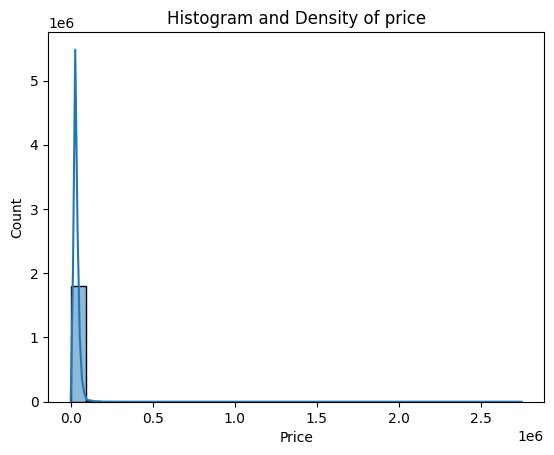

In [48]:
sns.histplot(data=df_short, x="price", bins=30, kde=True)

plt.xlabel("Price")
plt.title("Histogram and Density of price")
plt.show()

##### boxplot

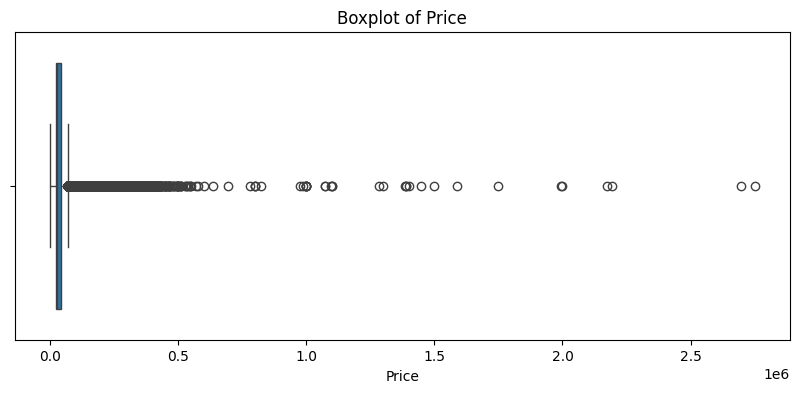

In [49]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df_short,x="price")

plt.title("Boxplot of Price")
plt.xlabel("Price")

plt.show()

#### La distribution sans les outliers

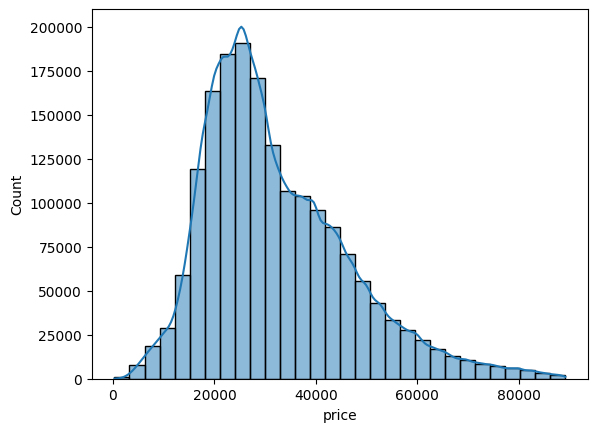

In [50]:
q99 = df_short["price"].quantile(0.99)

sns.histplot(
    data=df_short[df_short["price"] <= q99],
    x="price",
    bins=30,
    kde=True
)

plt.show()

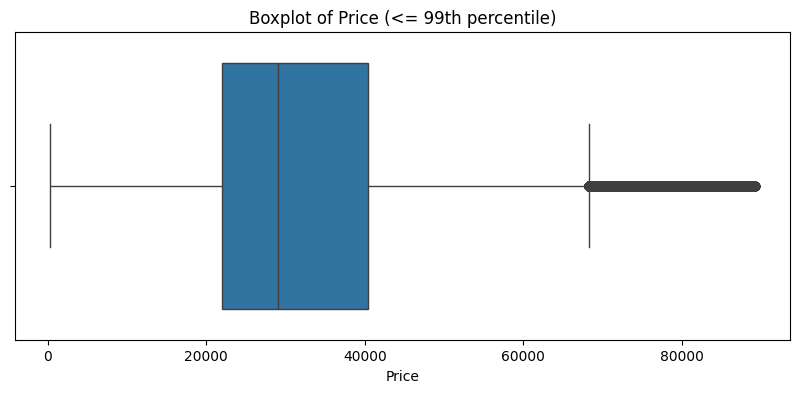

In [51]:
plt.figure(figsize=(10,4))

sns.boxplot(
    data=df_short[df_short["price"] <= q99],
    x="price"
)

plt.title("Boxplot of Price (<= 99th percentile)")
plt.xlabel("Price")

plt.show()

#### Transfomation logarothmique et affichage 

In [52]:
df_short["price_log"] = np.log1p(df_short["price"])

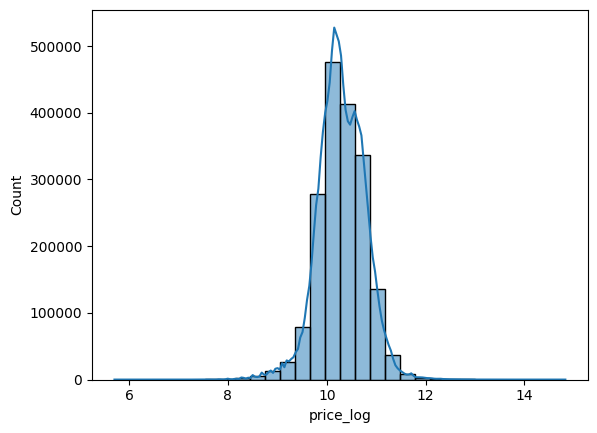

In [53]:
sns.histplot(
    data=df_short[df_short["price_log"] <= q99],
    x="price_log",
    bins=30,
    kde=True
)

plt.show()

### Prix moyen par type de boite à vitesses

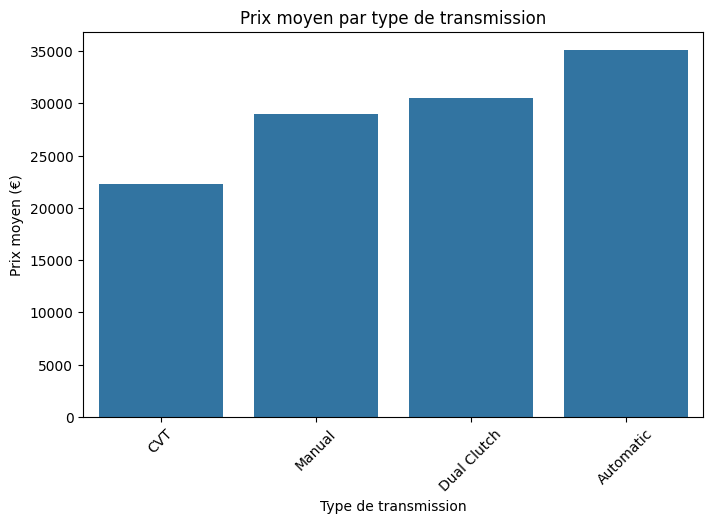

In [54]:
avg_price = (
    df_short
    .groupby("transmission_type", as_index=False)["price"]
    .mean()
    .sort_values(by="price")
)

plt.figure(figsize=(8,5))

sns.barplot(
    data=avg_price,
    x="transmission_type",
    y="price"
)

plt.title("Prix moyen par type de transmission")
plt.xlabel("Type de transmission")
plt.ylabel("Prix moyen (€)")
plt.xticks(rotation=45)

plt.show()

#### YEAR

In [55]:
df_short.groupby('year')['price'].agg(['mean','median','min','max','std','skew','kurt'])


,mean,median,min,max,std,skew,kurt
year,,,,,,,
1915,13823.750000,13447.5,9900.0,18500.0,3756.583942,0.456935,-1.267984
1921,20495.000000,20495.0,20495.0,20495.0,NaN,NaN,NaN
1923,21231.250000,15485.0,10995.0,40995.0,10915.080901,0.973674,-0.438443
1924,16900.000000,16900.0,16900.0,16900.0,NaN,NaN,NaN
1925,11500.000000,11500.0,11500.0,11500.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2017,25150.883474,22695.0,3490.0,1095000.0,12258.494581,15.289644,958.542376
2018,28595.695886,25577.0,4031.0,2698500.0,18364.830808,37.902287,4180.090454
2019,34667.790220,29998.0,7353.0,1448880.0,22371.550741,9.847613,295.365575


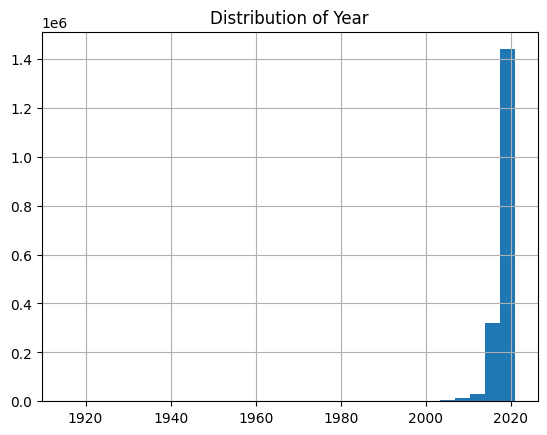

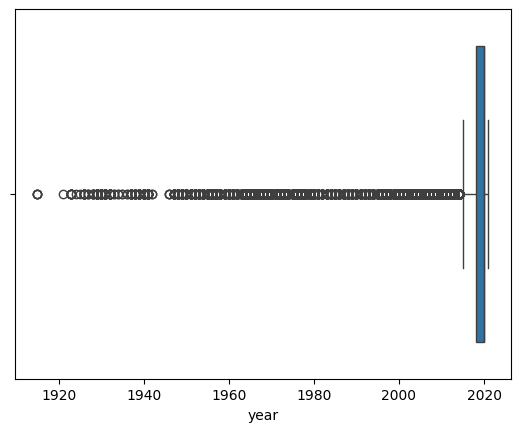

In [56]:
df_short['year'].hist(bins=30)
plt.title('Distribution of Year')
plt.show()

sns.boxplot(x=df_short['year'])
plt.show()


#### MILEAGE

In [57]:
df_short['mileage_group'] = pd.qcut(df_short['mileage'], 10, duplicates='drop')

df_short.groupby('mileage_group')['mileage'].agg(
['mean','median','min','max','std','skew','kurt']
)

,mean,median,min,max,std,skew,kurt
mileage_group,,,,,,,
"(-0.001, 3.0]",0.960486,0.0,0.0,3.0,1.160808,0.712990,-1.070935
"(3.0, 5.0]",4.743700,5.0,4.0,5.0,0.436591,-1.116393,-0.753677
"(5.0, 9.0]",7.249646,7.0,6.0,9.0,1.105208,0.295095,-1.268416
"(9.0, 12.0]",10.581714,10.0,10.0,12.0,0.789785,0.888347,-0.826847
"(12.0, 109.0]",26.834525,18.0,13.0,109.0,20.797011,2.177689,4.158469
"(109.0, 14437.0]",5952.098063,5111.0,110.0,14437.0,4439.859886,0.331273,-1.180900
"(14437.0, 29097.0]",22064.917289,22181.0,14438.0,29097.0,4186.637261,-0.078562,-1.164915
"(29097.0, 47200.0]",36709.990872,35959.0,29098.0,47200.0,5076.857171,0.342076,-1.030227
"(47200.0, 1225238.0]",86089.721041,75951.0,47201.0,1225238.0,37200.495217,2.503468,28.869404


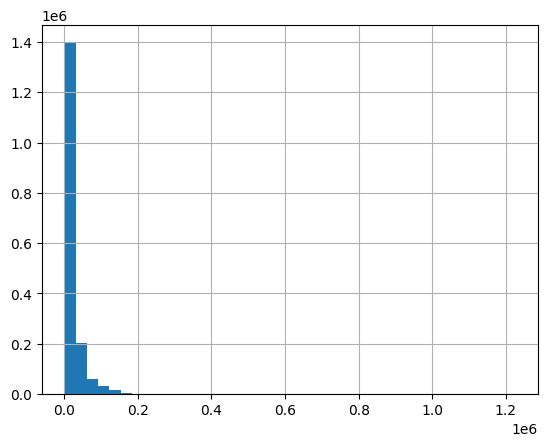

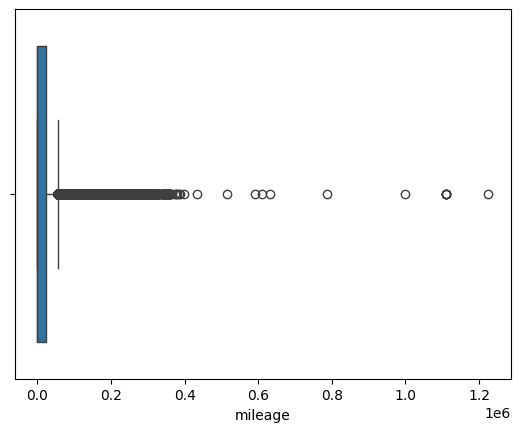

In [58]:
df_short['mileage'].hist(bins=40)
plt.show()

sns.boxplot(x=df_short['mileage'])
plt.show()


#### BODY TYPE

In [59]:
df_short.groupby('body_type')['body_type'].count()


body_type
Convertible          9557
Coupe               36560
Hatchback           52529
Minivan             39257
Pickup Truck       282640
SUV / Crossover    923982
Sedan              413065
Van                 28101
Wagon               19122
Name: body_type, dtype: int64

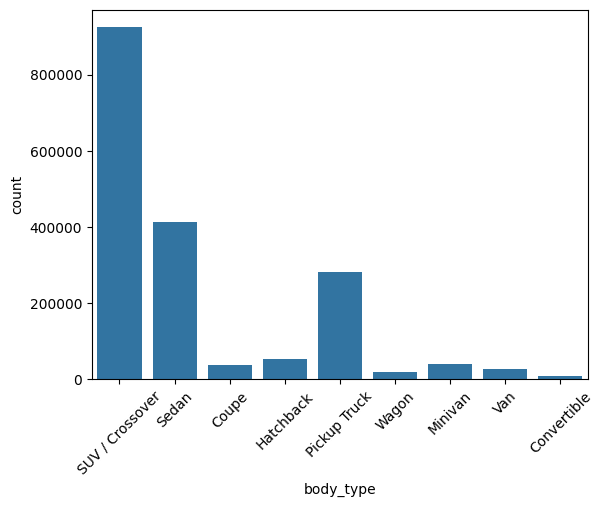

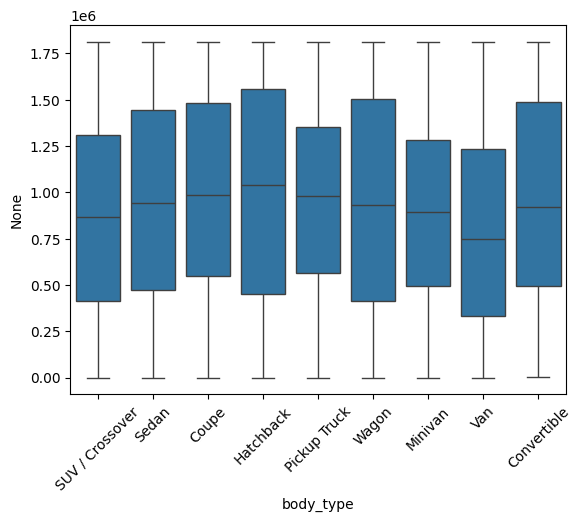

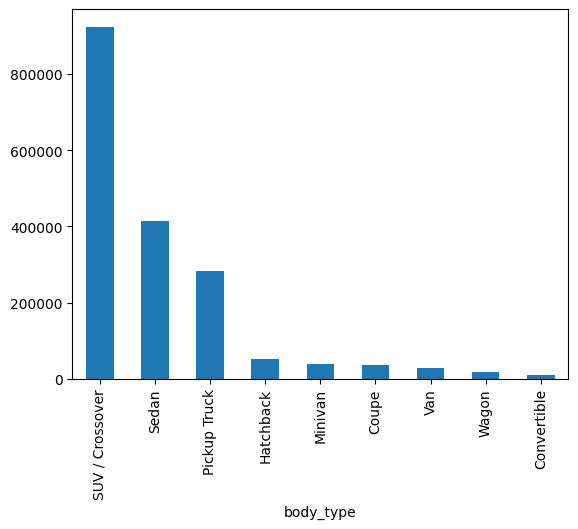

In [60]:
sns.countplot(x='body_type', data=df_short)
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='body_type', y=df_short.index, data=df_short)
plt.xticks(rotation=45)
plt.show()

df_short['body_type'].value_counts().plot(kind='bar')
plt.show()

#### HORSEPOWER

In [61]:
df_short['hp_group'] = pd.qcut(df_short['horsepower'], 10, duplicates='drop')

df_short.groupby('hp_group')['horsepower'].agg(
['mean','median','min','max','std','skew','kurt']
)

,mean,median,min,max,std,skew,kurt
hp_group,,,,,,,
"(54.999, 147.0]",133.797853,138.0,55.0,147.0,13.398314,-1.765249,4.049678
"(147.0, 170.0]",162.260369,166.0,148.0,170.0,7.997824,-0.453935,-1.340778
"(170.0, 180.0]",177.014357,177.0,171.0,180.0,2.747309,-0.211309,-1.337303
"(180.0, 190.0]",185.476416,185.0,181.0,190.0,3.093027,-0.026705,-1.338788
"(190.0, 240.0]",210.408637,203.0,191.0,240.0,15.967348,0.653066,-0.935569
"(240.0, 270.0]",253.975515,250.0,241.0,270.0,9.192720,0.580295,-0.907763
"(270.0, 290.0]",281.878671,280.0,271.0,290.0,5.466037,-0.155419,-0.774220
"(290.0, 310.0]",301.829850,300.0,291.0,310.0,6.444352,0.042779,-1.519730
"(310.0, 375.0]",358.229667,360.0,311.0,375.0,17.594269,-0.892307,-0.172213


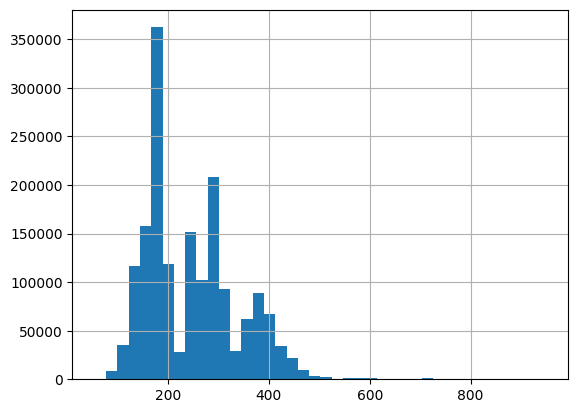

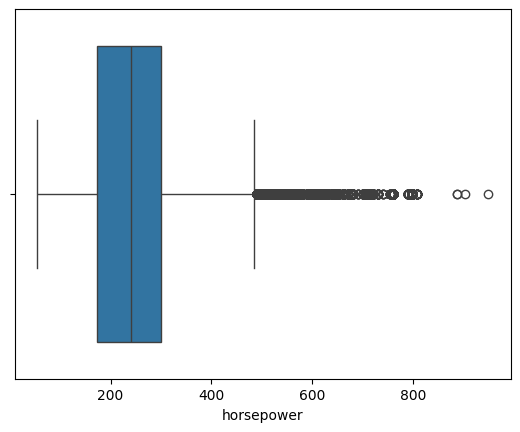

In [62]:

df_short['horsepower'].hist(bins=40)
plt.show()

sns.boxplot(x=df_short['horsepower'])
plt.show()

#### FUEL TYPE

In [63]:
df_short.groupby('fuel_type')['fuel_type'].count()

fuel_type
Biodiesel                   15297
Compressed Natural Gas         59
Diesel                      22022
Electric                    12580
Flex Fuel Vehicle           69985
Gasoline                  1598404
Hybrid                      52038
Propane                         2
Name: fuel_type, dtype: int64

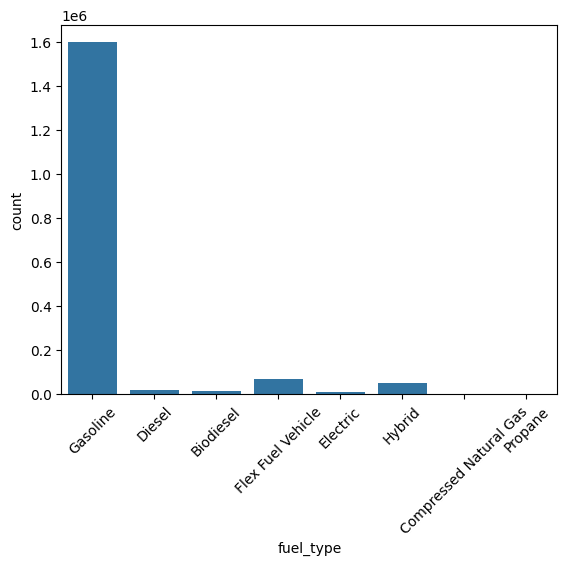

In [64]:
sns.countplot(x='fuel_type', data=df_short)
plt.xticks(rotation=45)
plt.show()




#### CITY FUEL ECONOMY

In [65]:
df_short['fueleco_group'] = pd.qcut(df_short['city_fuel_economy'], 10, duplicates='drop')

df_short.groupby('fueleco_group')['city_fuel_economy'].agg(
['mean','median','min','max','std','skew','kurt']
)


,mean,median,min,max,std,skew,kurt
fueleco_group,,,,,,,
"(7.999, 16.0]",15.231441,15.0,8.0,16.0,0.912806,-1.462093,2.745415
"(16.0, 18.0]",17.574140,18.0,17.0,18.0,0.494474,-0.299877,-1.910092
"(18.0, 19.0]",19.000000,19.0,19.0,19.0,0.000000,0.000000,0.000000
"(19.0, 20.0]",20.000000,20.0,20.0,20.0,0.000000,0.000000,0.000000
"(20.0, 22.0]",21.493833,21.0,21.0,22.0,0.499963,0.024670,-1.999410
"(22.0, 23.0]",23.000000,23.0,23.0,23.0,0.000000,0.000000,0.000000
"(23.0, 26.0]",25.181302,25.0,24.0,26.0,0.812395,-0.342483,-1.404935
"(26.0, 27.0]",27.000000,27.0,27.0,27.0,0.000000,0.000000,0.000000
"(27.0, 30.0]",28.968867,29.0,28.0,30.0,0.859481,0.059681,-1.643742


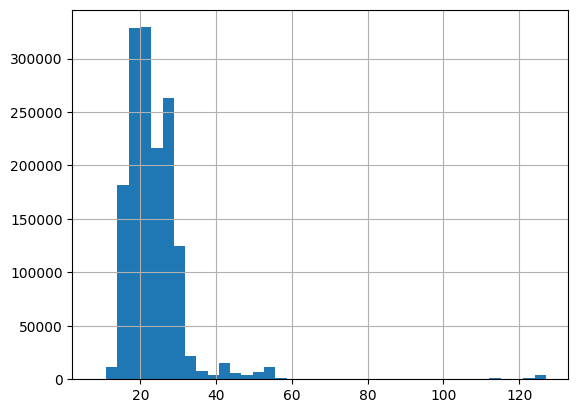

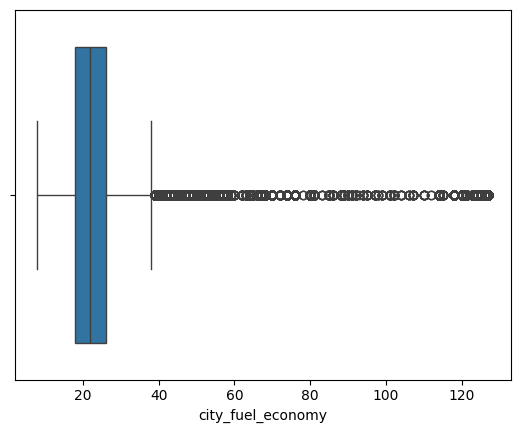

In [66]:
df_short['city_fuel_economy'].hist(bins=40)
plt.show()

sns.boxplot(x=df_short['city_fuel_economy'])
plt.show()


#### TRANSMISSION TYPE

In [67]:
df_short.groupby('transmission_type')['transmission_type'].count()

transmission_type
Automatic      1434816
CVT               1525
Dual Clutch       7005
Manual           21422
Name: transmission_type, dtype: int64

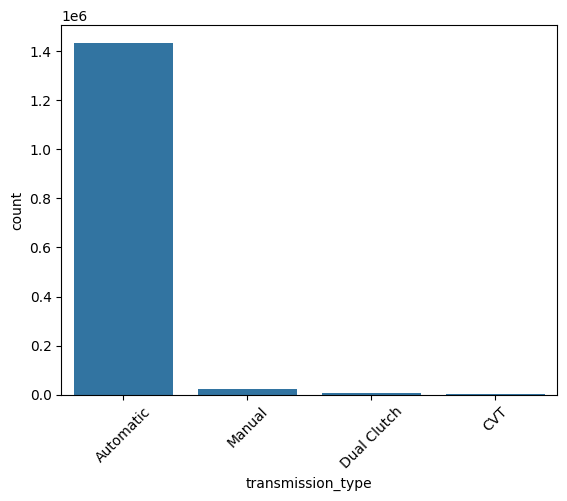

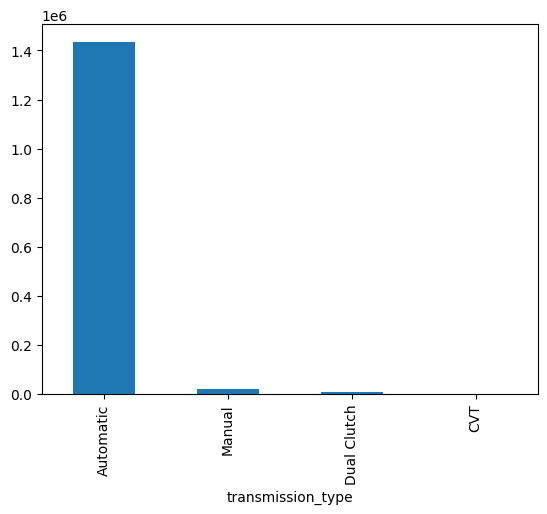

In [68]:
sns.countplot(x='transmission_type', data=df_short)
plt.xticks(rotation=45)
plt.show()

df_short['transmission_type'].value_counts().plot(kind='bar')
plt.show()

### Analyse multivariée

#### Matrice de corrélation (pour choisir les interactions)

<Axes: >

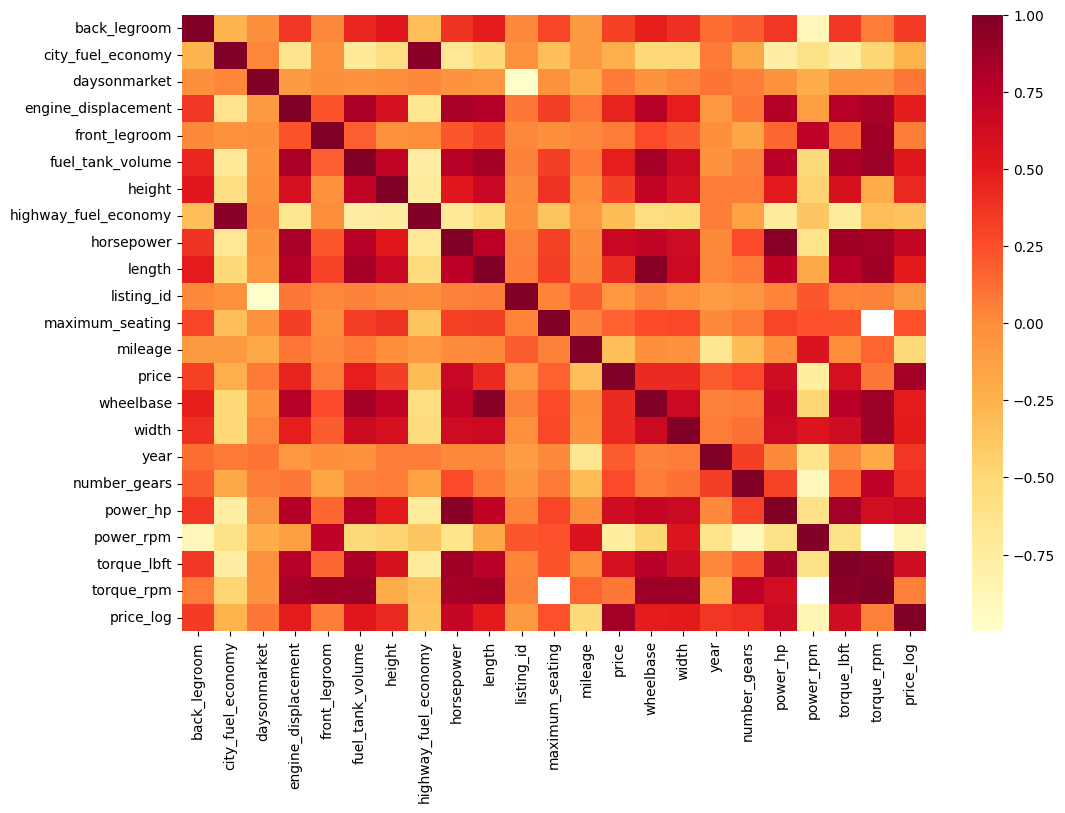

In [71]:
df_short_no_cy=df_short.drop(columns=['engine_cylinders'])
corr = df_short_no_cy.select_dtypes(include='number').corr()

corr['price'].sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='YlOrRd')

#### PRICE vs HORSEPOWER

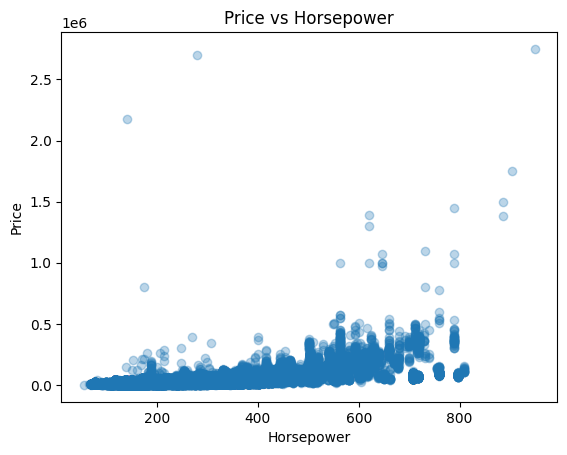

In [72]:
plt.scatter(df_short['horsepower'], df_short['price'], alpha=0.3)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Price vs Horsepower')
plt.show()

#### HORSEPOWER vs FUEL ECONOMY

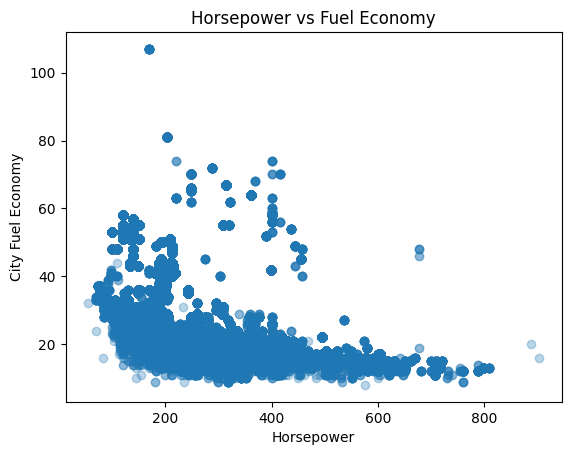

In [73]:
plt.scatter(df_short['horsepower'], df_short['city_fuel_economy'], alpha=0.3)
plt.xlabel('Horsepower')
plt.ylabel('City Fuel Economy')
plt.title('Horsepower vs Fuel Economy')
plt.show()

#### engine displacement  vs horsepower

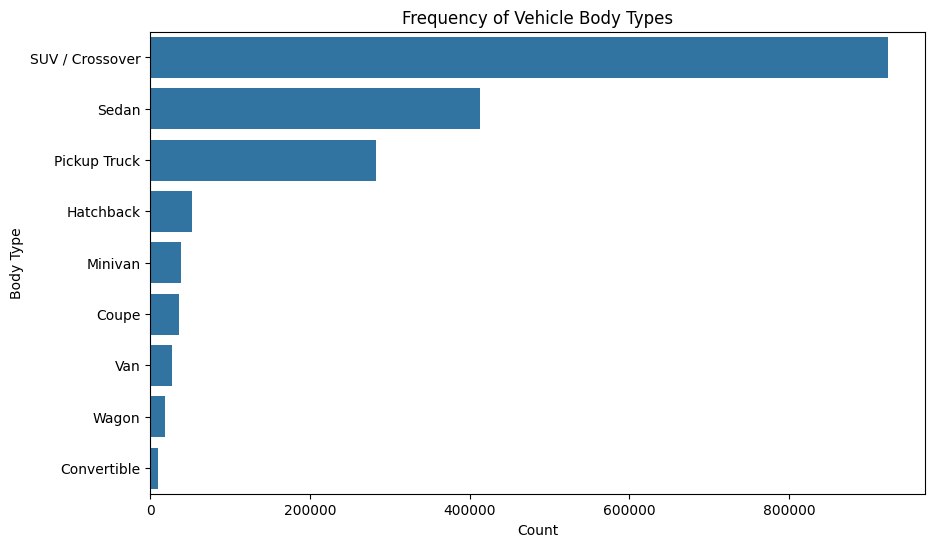

In [74]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df_short,
    y='body_type',
    order=df_short['body_type'].value_counts().index
)

plt.title("Frequency of Vehicle Body Types")
plt.xlabel("Count")
plt.ylabel("Body Type")

plt.show()

In [75]:
df_short['transmission_type'].value_counts(normalize=True)*100

transmission_type
Automatic      97.955171
Manual          1.462484
Dual Clutch     0.478233
CVT             0.104112
Name: proportion, dtype: float64

In [76]:
df_short.columns


Index(['vin', 'back_legroom', 'body_type', 'city_fuel_economy', 'daysonmarket',
       'engine_cylinders', 'engine_displacement', 'engine_type', 'fleet',
       'franchise_dealer', 'franchise_make', 'front_legroom',
       'fuel_tank_volume', 'fuel_type', 'height', 'highway_fuel_economy',
       'horsepower', 'is_new', 'length', 'listed_date', 'listing_color',
       'listing_id', 'major_options', 'make_name', 'maximum_seating',
       'mileage', 'model_name', 'power', 'price', 'sp_name', 'torque',
       'transmission', 'transmission_display', 'trimId', 'trim_name',
       'wheel_system', 'wheel_system_display', 'wheelbase', 'width', 'year',
       'transmission_type', 'number_gears', 'power_hp', 'power_rpm',
       'torque_lbft', 'torque_rpm', 'price_log', 'mileage_group', 'hp_group',
       'fueleco_group'],
      dtype='str')

### Body type par Fuel_type

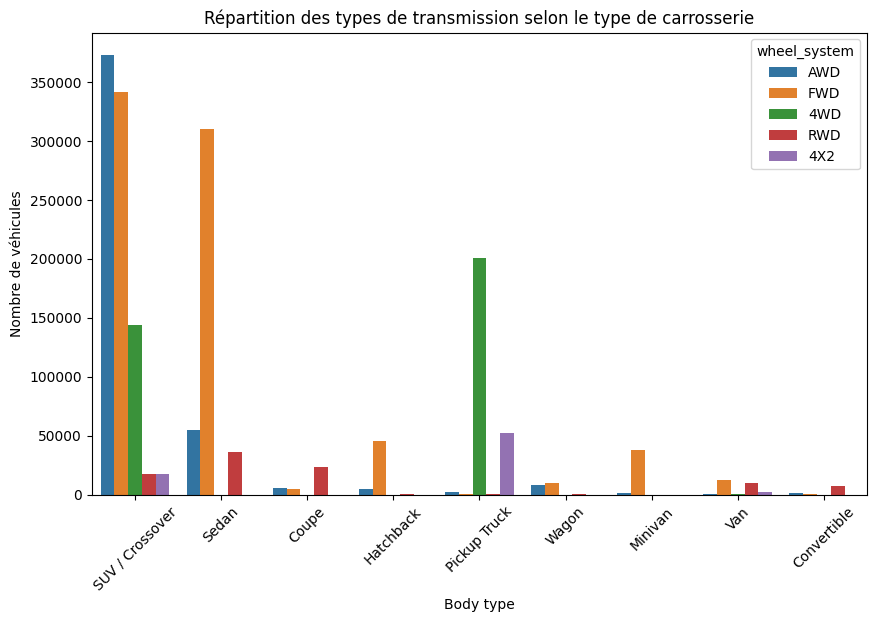

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_short,x="body_type",hue="wheel_system")
plt.title("Répartition des types de transmission selon le type de carrosserie")
plt.xlabel("Body type")
plt.ylabel("Nombre de véhicules")
plt.xticks(rotation=45)

plt.show()

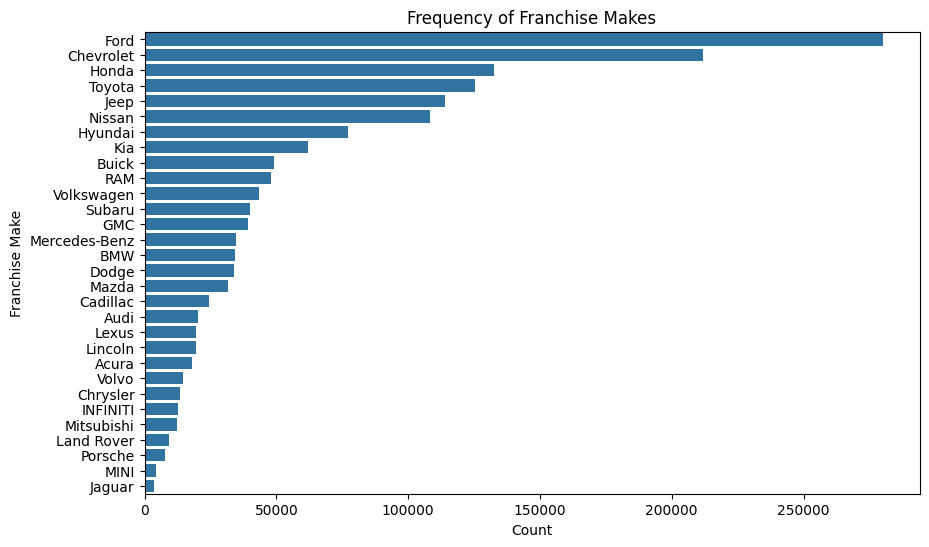

In [78]:
plt.figure(figsize=(10,6))

sns.countplot(data=df_short,y='franchise_make',order=df_short['franchise_make'].value_counts().head(30).index)

plt.title("Frequency of Franchise Makes")
plt.xlabel("Count")
plt.ylabel("Franchise Make")

plt.show()

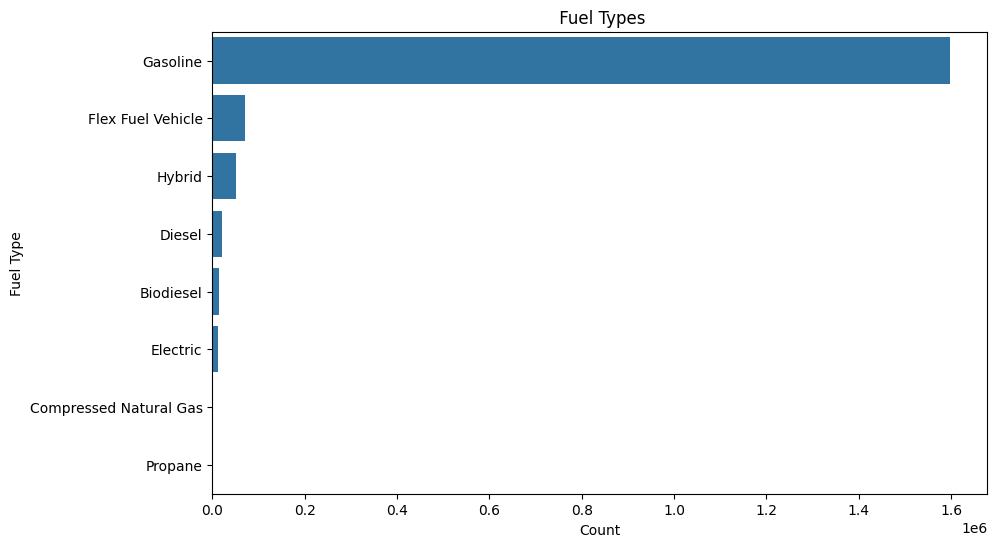

In [79]:
plt.figure(figsize=(10,6))

ax = sns.countplot(data=df_short,y='fuel_type',order=df_short['fuel_type'].value_counts().index)

# Calculer le total
total = df_short['fuel_type'].notna().sum()


plt.title(" Fuel Types")
plt.xlabel("Count")
plt.ylabel("Fuel Type")

plt.show()

<Axes: xlabel='engine_displacement', ylabel='horsepower'>

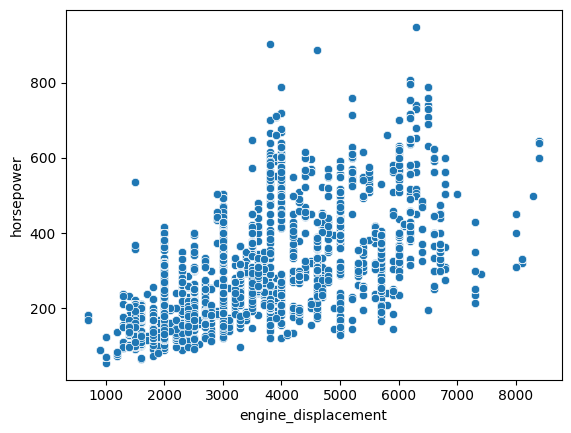

In [80]:
sns.scatterplot(data=df_short,x='engine_displacement', y='horsepower')

## Preprocessing

### Supprimer les colonnes inutiles

In [81]:
cols_keep = [
'price','year','mileage',
'body_type','fuel_type','transmission_type',
'horsepower','engine_cylinders','engine_displacement',
'city_fuel_economy','highway_fuel_economy','maximum_seating','length','width','height','wheelbase','is_new','daysonmarket']

df_short.drop(columns=df_short.columns.difference(cols_keep), inplace=True)

### Missing values

In [82]:
df_short.isna().sum().sort_values(ascending=False)

engine_cylinders        1814329
transmission_type        349561
highway_fuel_economy     272938
city_fuel_economy        272938
engine_displacement      106104
horsepower               106104
maximum_seating           92917
height                    92909
width                     92908
length                    92906
wheelbase                 92891
mileage                   92177
fuel_type                 43942
body_type                  9516
is_new                        0
daysonmarket                  0
price                         0
year                          0
dtype: int64

#### Variables Numériques

In [83]:
num_cols = df_short.select_dtypes(include='number').columns

df_short[num_cols] = df_short[num_cols].fillna(
    df_short[num_cols].median()
)

#### Variables Catégorielles

In [84]:
cat_cols = df_short.select_dtypes(include='object').columns

for col in cat_cols:
    df_short[col].fillna(df_short[col].mode()[0], inplace=True)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_25980\3015618520.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df_short.select_dtypes(include='object').columns
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_25980\3015618520.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For ex

### Outliers (variables principales seulement)
#### En utilisant la méthide de l'intervalle interquantiles

In [85]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    low = Q1 - 1.5*IQR
    high = Q3 + 1.5*IQR
    
    return df[(df[col] >= low) & (df[col] <= high)]

In [86]:
for col in ['price','mileage','horsepower','city_fuel_economy']:
    df_short = remove_outliers(df_short, col)

### Vérification finale

In [87]:
df_short.info()

<class 'pandas.DataFrame'>
Index: 1556039 entries, 0 to 1814328
Data columns (total 18 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   body_type             1547610 non-null  str    
 1   city_fuel_economy     1556039 non-null  float64
 2   daysonmarket          1556039 non-null  int64  
 3   engine_cylinders      0 non-null        float64
 4   engine_displacement   1556039 non-null  float64
 5   fuel_type             1519850 non-null  str    
 6   height                1556039 non-null  float64
 7   highway_fuel_economy  1556039 non-null  float64
 8   horsepower            1556039 non-null  float64
 9   is_new                1556039 non-null  bool   
 10  length                1556039 non-null  float64
 11  maximum_seating       1556039 non-null  float64
 12  mileage               1556039 non-null  float64
 13  price                 1556039 non-null  float64
 14  wheelbase             1556039 non-null  float64
 1

In [88]:
df_short.describe()

,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,height,highway_fuel_economy,horsepower,length,maximum_seating,mileage,price,wheelbase,width,year
count,1.556039e+06,1.556039e+06,0.0,1.556039e+06,1.556039e+06,1.556039e+06,1.556039e+06,1.556039e+06,1.556039e+06,1.556039e+06,1.556039e+06,1.556039e+06,1.556039e+06,1.556039e+06
mean,2.232384e+01,7.864330e+01,NaN,2.758087e+03,6.608672e+01,2.931252e+01,2.411721e+02,1.924770e+02,5.420282e+00,7.728445e+03,3.257642e+04,1.146902e+02,7.851570e+01,2.019305e+03
std,4.328472e+00,8.671836e+01,NaN,1.216187e+03,7.084344e+00,4.945477e+00,8.188876e+01,1.963210e+01,1.050940e+00,1.372656e+04,1.243374e+04,1.398386e+01,7.540290e+00,2.324220e+00
min,9.000000e+00,0.000000e+00,NaN,7.000000e+02,4.400000e+01,1.300000e+01,7.000000e+01,1.061000e+02,2.000000e+00,0.000000e+00,2.990000e+02,7.350000e+01,5.700000e+01,1.915000e+03
25%,1.900000e+01,1.900000e+01,NaN,2.000000e+03,5.970000e+01,2.600000e+01,1.750000e+02,1.820000e+02,5.000000e+00,4.000000e+00,2.297400e+04,1.063000e+02,7.260000e+01,2.019000e+03
50%,2.200000e+01,4.200000e+01,NaN,2.500000e+03,6.610000e+01,2.900000e+01,2.400000e+02,1.898000e+02,5.000000e+00,1.100000e+01,2.973000e+04,1.110000e+02,7.770000e+01,2.020000e+03
75%,2.600000e+01,9.800000e+01,NaN,3.500000e+03,6.990000e+01,3.200000e+01,2.950000e+02,1.984000e+02,6.000000e+00,1.094100e+04,4.082900e+04,1.173000e+02,8.330000e+01,2.020000e+03
max,3.600000e+01,3.640000e+02,NaN,8.100000e+03,1.176000e+02,5.200000e+01,4.750000e+02,2.900000e+02,1.500000e+01,5.324900e+04,6.943500e+04,2.010000e+02,1.090000e+02,2.021000e+03


In [89]:
df_short.isna().sum()

body_type                  8429
city_fuel_economy             0
daysonmarket                  0
engine_cylinders        1556039
engine_displacement           0
fuel_type                 36189
height                        0
highway_fuel_economy          0
horsepower                    0
is_new                        0
length                        0
maximum_seating               0
mileage                       0
price                         0
wheelbase                     0
width                         0
year                          0
transmission_type        294136
dtype: int64

## Train test split to use scalers

In [90]:
df_train, df_test = train_test_split(df_short, test_size=0.2, random_state=42)

## Standadization of price

In [91]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()

df_train[["price_std"]] = scaler_std.fit_transform(df_train[["price"]])


In [92]:
df_train["price_log"] = np.log1p(df_train["price"])

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler_mm = MinMaxScaler()

df_train[["daysonmarket_norm"]] = scaler_mm.fit_transform(df_train[["daysonmarket"]])

## Encoding of categorical columns

In [94]:
df_train['body_type'].value_counts()

body_type
SUV / Crossover    656388
Sedan              273245
Pickup Truck       199487
Hatchback           28026
Minivan             26399
Coupe               20693
Van                 19896
Wagon                9289
Convertible          4681
Name: count, dtype: int64

In [95]:
encoder = OneHotEncoder(sparse_output=False)

trans_encoded = encoder.fit_transform(df_train[["body_type"]])

In [96]:
df_train.head()

,body_type,city_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,fuel_type,height,highway_fuel_economy,horsepower,is_new,length,maximum_seating,mileage,price,wheelbase,width,year,transmission_type,price_std,price_log,daysonmarket_norm
1746541,SUV / Crossover,26.0,37,NaN,1400.0,Gasoline,66.0,31.0,138.0,True,167.6,5.0,5.0,21344.0,100.6,69.9,2020,Automatic,-0.903479,9.968573,0.101648
1606967,SUV / Crossover,26.0,245,NaN,2500.0,Gasoline,66.3,33.0,170.0,True,184.5,5.0,1.0,21985.0,106.5,72.4,2020,<NA>,-0.851910,9.998161,0.673077
1361229,Minivan,19.0,7,NaN,3500.0,Gasoline,70.7,27.0,296.0,False,200.6,8.0,36714.0,32938.0,119.3,78.1,2019,Automatic,0.029277,10.402413,0.019231
274774,SUV / Crossover,19.0,5,NaN,3600.0,Gasoline,66.0,27.0,310.0,False,189.5,5.0,29750.0,25998.0,112.5,75.0,2017,Automatic,-0.529057,10.165813,0.013736
656807,SUV / Crossover,18.0,43,NaN,3600.0,Gasoline,69.3,25.0,295.0,True,189.8,5.0,6.0,34827.0,114.7,84.8,2020,Automatic,0.181251,10.458177,0.118132


### Encoder la variable body_type 

In [97]:
df_short['body_type'].value_counts()

body_type
SUV / Crossover    820171
Sedan              341738
Pickup Truck       249507
Hatchback           35020
Minivan             32956
Coupe               25897
Van                 24922
Wagon               11551
Convertible          5848
Name: count, dtype: int64

In [98]:
encoder_bodytype = OneHotEncoder(sparse_output=False)
encoded = encoder_bodytype.fit_transform(df_short[["body_type"]])

### Discrétiser city_fuel_economy

In [99]:
df_short['city_fuel_economy'].agg(['mean','median','min','max','std','skew','kurt'])

mean      22.323839
median    22.000000
min        9.000000
max       36.000000
std        4.328472
skew       0.335275
kurt      -0.361625
Name: city_fuel_economy, dtype: float64

In [100]:
mean = df_short["city_fuel_economy"].mean()
std = df_short["city_fuel_economy"].std()

def fuel_category(x):
    if x < mean - std:
        return "high"        
    elif x > mean + std:
        return "economic"    
    else:
        return "medium"

df_short["fuel_consumption"] = df_short["city_fuel_economy"].apply(fuel_category)